#Tuned ML Models (Method 2)

#Importing Packages


In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

In [ ]:
#Importing the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import tensorflow as tf
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
import sklearn
sklearn.__version__

'1.5.2'

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


##Importing datasets created from the first method OSEMN
Refer to 'OSEMN & Baseline Machine Learning Models (Method 2)

In [ ]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

#Tuned Machine Learning Models

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()
logistic_regression = LogisticRegression(n_jobs=-1, random_state=42)
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

####Tuned Naive Bayes Model

Best hyperparameters for Naive Bayes: {'var_smoothing': 1.2328467394420635e-09}
Tuned Naive Bayes - Accuracy: 0.9472854614938512
Tuned Naive Bayes - Precision: 0.22413793103448276
Tuned Naive Bayes - Recall: 0.0018418815528478323
Tuned Naive Bayes - F1 Score: 0.0036537380550871273
Tuned Naive Bayes - FPR: 0.00035310734463276836
Tuned Naive Bayes - TPR: 0.0018418815528478323
Tuned Naive Bayes - FNR: 0.9981581184471522
Tuned Naive Bayes - TNR: 0.9996468926553672
Tuned Naive Bayes - Youden's J: 0.001488774208215064


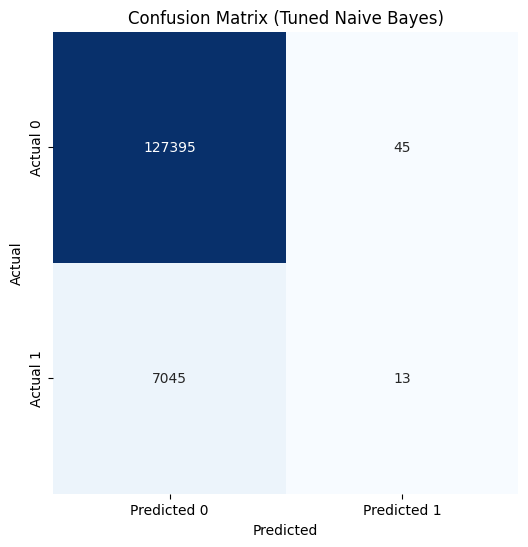

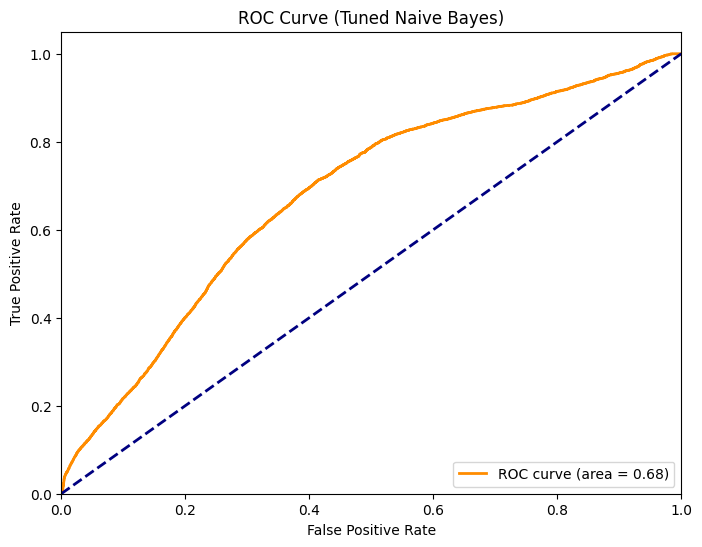

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Initialize GridSearchCV
grid_search_nb = GridSearchCV(estimator=naive_bayes, param_grid=param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search_nb.fit(X_train_smote1, y_train_smote1)

# Get the best hyperparameters
best_params_nb = grid_search_nb.best_params_
print(f"Best hyperparameters for Naive Bayes: {best_params_nb}")

# Train the model with the best hyperparameters
best_naive_bayes = GaussianNB(**best_params_nb)
best_naive_bayes.fit(X_train_smote1, y_train_smote1)
y_pred_nb_tuned = best_naive_bayes.predict(X_test1)
y_prob_nb_tuned = best_naive_bayes.predict_proba(X_test1)[:,1]

# Evaluate the tuned model
accuracy_nb_tuned = accuracy_score(y_test1, y_pred_nb_tuned)
precision_nb_tuned = precision_score(y_test1, y_pred_nb_tuned)
recall_nb_tuned = recall_score(y_test1, y_pred_nb_tuned)
f1_nb_tuned = f1_score(y_test1, y_pred_nb_tuned)

# Confusion Matrix
conf_matrix_nb_tuned = confusion_matrix(y_test1, y_pred_nb_tuned)
TN_nb_tuned = conf_matrix_nb_tuned[0,0]
FP_nb_tuned = conf_matrix_nb_tuned[0,1]
FN_nb_tuned = conf_matrix_nb_tuned[1,0]
TP_nb_tuned = conf_matrix_nb_tuned[1,1]

# Rates
FPR_nb_tuned = FP_nb_tuned / (FP_nb_tuned + TN_nb_tuned)
TPR_nb_tuned = TP_nb_tuned / (TP_nb_tuned + FN_nb_tuned)
FNR_nb_tuned = FN_nb_tuned / (FN_nb_tuned + TP_nb_tuned)
TNR_nb_tuned = TN_nb_tuned / (TN_nb_tuned + FP_nb_tuned)

# Youden's J statistic
youden_j_nb_tuned = TPR_nb_tuned - FPR_nb_tuned

# ROC Curve
fpr_nb_tuned, tpr_nb_tuned, thresholds_nb_tuned = roc_curve(y_test1, y_prob_nb_tuned)
roc_auc_nb_tuned = auc(fpr_nb_tuned, tpr_nb_tuned)

print(f"Tuned Naive Bayes - Accuracy: {accuracy_nb_tuned}")
print(f"Tuned Naive Bayes - Precision: {precision_nb_tuned}")
print(f"Tuned Naive Bayes - Recall: {recall_nb_tuned}")
print(f"Tuned Naive Bayes - F1 Score: {f1_nb_tuned}")
print(f"Tuned Naive Bayes - FPR: {FPR_nb_tuned}")
print(f"Tuned Naive Bayes - TPR: {TPR_nb_tuned}")
print(f"Tuned Naive Bayes - FNR: {FNR_nb_tuned}")
print(f"Tuned Naive Bayes - TNR: {TNR_nb_tuned}")
print(f"Tuned Naive Bayes - Youden's J: {youden_j_nb_tuned}")

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_tuned, tpr_nb_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_nb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Naive Bayes)')
plt.legend(loc="lower right")
plt.show()

####Tuned Decision Tree Model

Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree - Accuracy: 0.9539547056461806
Tuned Decision Tree - Precision: 0.5464205216271332
Tuned Decision Tree - Recall: 0.7213091527344857
Tuned Decision Tree - F1 Score: 0.6218015267175573
Tuned Decision Tree - FPR: 0.03316070307595732
Tuned Decision Tree - TPR: 0.7213091527344857
Tuned Decision Tree - FNR: 0.2786908472655143
Tuned Decision Tree - TNR: 0.9668392969240427
Tuned Decision Tree - Youden's J: 0.6881484496585284


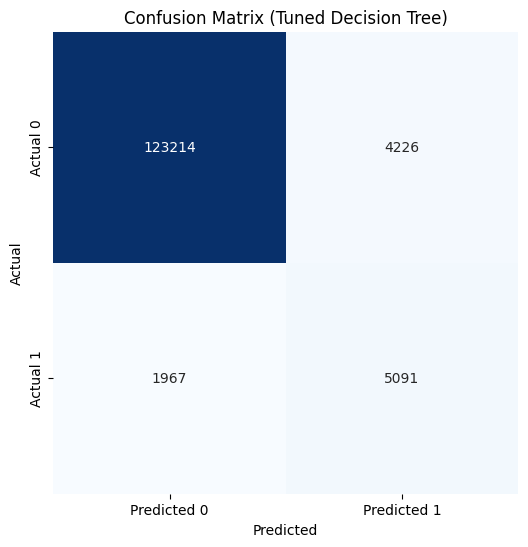

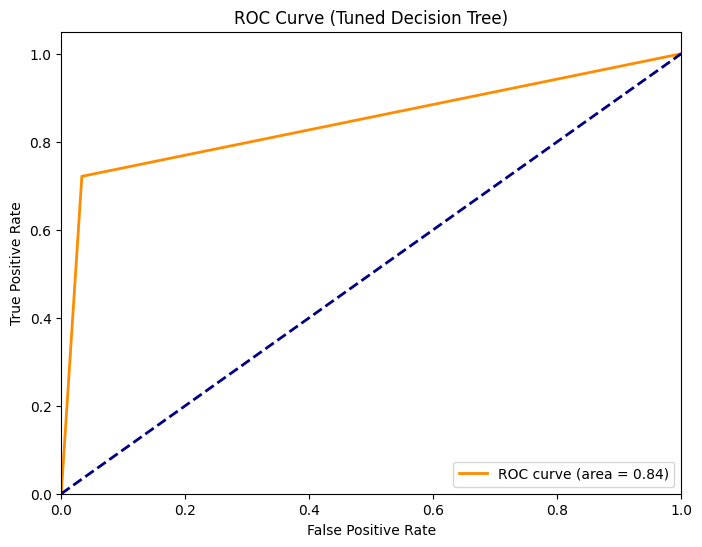

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(X_train_smote1, y_train_smote1)

best_params_dt = grid_search_dt.best_params_
print(f"Best hyperparameters for Decision Tree: {best_params_dt}")

best_decision_tree = DecisionTreeClassifier(**best_params_dt)
best_decision_tree.fit(X_train_smote1, y_train_smote1)
y_pred_dt_tuned = best_decision_tree.predict(X_test1)
y_prob_dt_tuned = best_decision_tree.predict_proba(X_test1)[:, 1]

accuracy_dt_tuned = accuracy_score(y_test1, y_pred_dt_tuned)
precision_dt_tuned = precision_score(y_test1, y_pred_dt_tuned)
recall_dt_tuned = recall_score(y_test1, y_pred_dt_tuned)
f1_dt_tuned = f1_score(y_test1, y_pred_dt_tuned)

conf_matrix_dt_tuned = confusion_matrix(y_test1, y_pred_dt_tuned)
TN_dt_tuned = conf_matrix_dt_tuned[0, 0]
FP_dt_tuned = conf_matrix_dt_tuned[0, 1]
FN_dt_tuned = conf_matrix_dt_tuned[1, 0]
TP_dt_tuned = conf_matrix_dt_tuned[1, 1]

FPR_dt_tuned = FP_dt_tuned / (FP_dt_tuned + TN_dt_tuned) if (FP_dt_tuned + TN_dt_tuned) != 0 else 0
TPR_dt_tuned = TP_dt_tuned / (TP_dt_tuned + FN_dt_tuned) if (TP_dt_tuned + FN_dt_tuned) != 0 else 0
FNR_dt_tuned = FN_dt_tuned / (FN_dt_tuned + TP_dt_tuned) if (FN_dt_tuned + TP_dt_tuned) != 0 else 0
TNR_dt_tuned = TN_dt_tuned / (TN_dt_tuned + FP_dt_tuned) if (TN_dt_tuned + FP_dt_tuned) != 0 else 0

youden_j_dt_tuned = TPR_dt_tuned - FPR_dt_tuned

fpr_dt_tuned, tpr_dt_tuned, thresholds_dt_tuned = roc_curve(y_test1, y_prob_dt_tuned)
roc_auc_dt_tuned = auc(fpr_dt_tuned, tpr_dt_tuned)

print(f"Tuned Decision Tree - Accuracy: {accuracy_dt_tuned}")
print(f"Tuned Decision Tree - Precision: {precision_dt_tuned}")
print(f"Tuned Decision Tree - Recall: {recall_dt_tuned}")
print(f"Tuned Decision Tree - F1 Score: {f1_dt_tuned}")
print(f"Tuned Decision Tree - FPR: {FPR_dt_tuned}")
print(f"Tuned Decision Tree - TPR: {TPR_dt_tuned}")
print(f"Tuned Decision Tree - FNR: {FNR_dt_tuned}")
print(f"Tuned Decision Tree - TNR: {TNR_dt_tuned}")
print(f"Tuned Decision Tree - Youden's J: {youden_j_dt_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_dt_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_tuned, tpr_dt_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Decision Tree)')
plt.legend(loc="lower right")
plt.show()

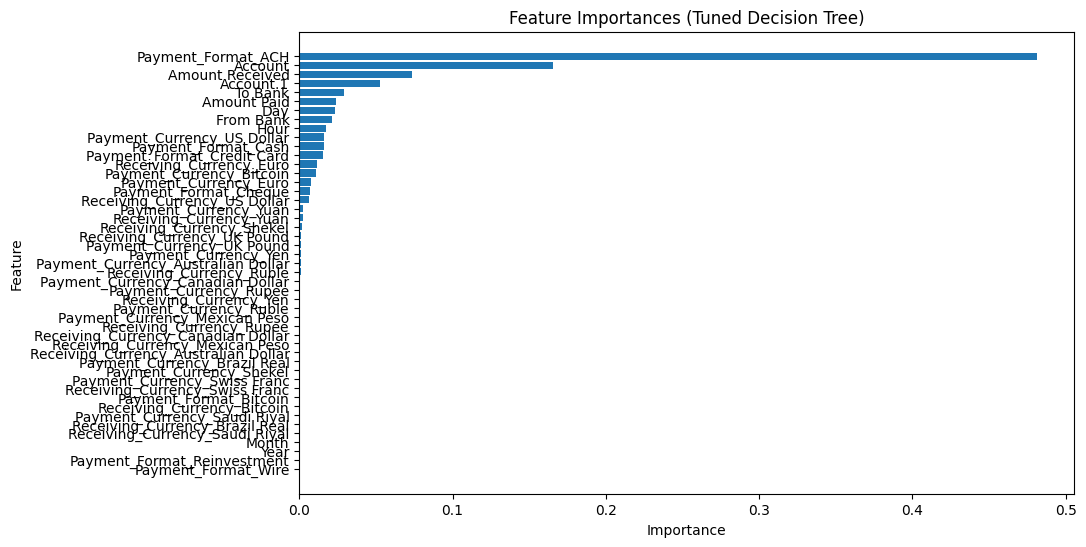

In [ ]:
feature_importances = best_decision_tree.feature_importances_

feature_names = X_train_smote1.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Tuned Decision Tree)')
plt.gca().invert_yaxis()
plt.show()

####Tuned Random Forest Model

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest - Accuracy: 0.964995762018766
Tuned Random Forest - Precision: 0.6369783166239217
Tuned Random Forest - Recall: 0.7741569849815811
Tuned Random Forest - F1 Score: 0.6988999744180097
Tuned Random Forest - FPR: 0.02443502824858757
Tuned Random Forest - TPR: 0.7741569849815811
Tuned Random Forest - FNR: 0.2258430150184188
Tuned Random Forest - TNR: 0.9755649717514124
Tuned Random Forest - Youden's J: 0.7497219567329936


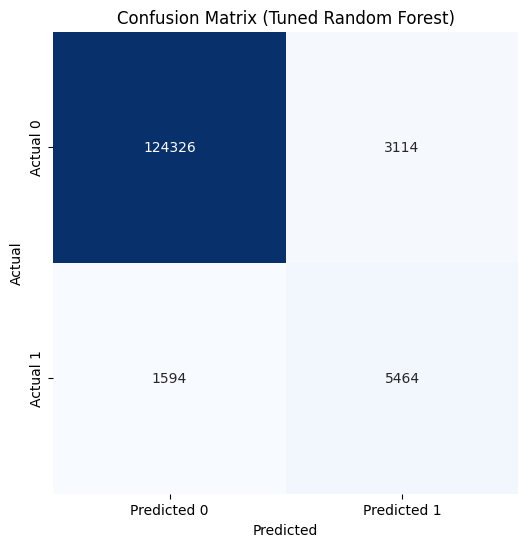

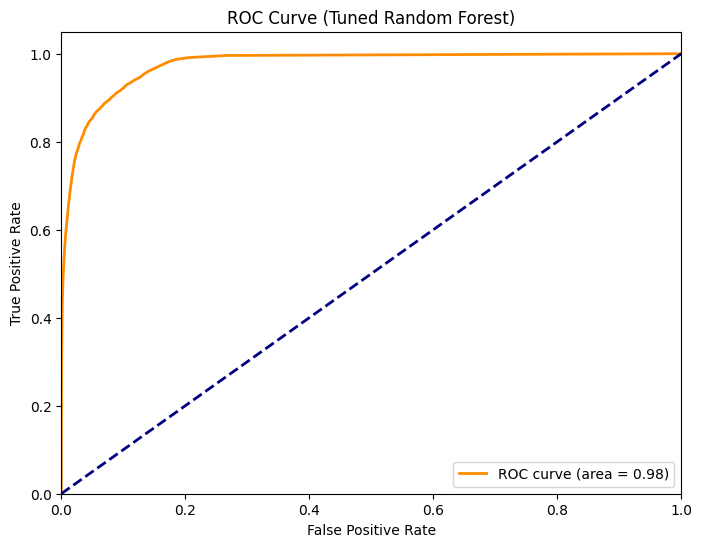

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train_smote1, y_train_smote1)

best_params_rf = grid_search_rf.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_rf}")

best_random_forest = RandomForestClassifier(**best_params_rf)
best_random_forest.fit(X_train_smote1, y_train_smote1)
y_pred_rf_tuned = best_random_forest.predict(X_test1)
y_prob_rf_tuned = best_random_forest.predict_proba(X_test1)[:, 1]

accuracy_rf_tuned = accuracy_score(y_test1, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test1, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test1, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test1, y_pred_rf_tuned)

conf_matrix_rf_tuned = confusion_matrix(y_test1, y_pred_rf_tuned)
TN_rf_tuned = conf_matrix_rf_tuned[0,0]
FP_rf_tuned = conf_matrix_rf_tuned[0,1]
FN_rf_tuned = conf_matrix_rf_tuned[1,0]
TP_rf_tuned = conf_matrix_rf_tuned[1,1]

FPR_rf_tuned = FP_rf_tuned / (FP_rf_tuned + TN_rf_tuned)
TPR_rf_tuned = TP_rf_tuned / (TP_rf_tuned + FN_rf_tuned)
FNR_rf_tuned = FN_rf_tuned / (FN_rf_tuned + TP_rf_tuned)
TNR_rf_tuned = TN_rf_tuned / (TN_rf_tuned + FP_rf_tuned)

youden_j_rf_tuned = TPR_rf_tuned - FPR_rf_tuned

fpr_rf_tuned, tpr_rf_tuned, thresholds_rf_tuned = roc_curve(y_test1, y_prob_rf_tuned)
roc_auc_rf_tuned = auc(fpr_rf_tuned, tpr_rf_tuned)

print(f"Tuned Random Forest - Accuracy: {accuracy_rf_tuned}")
print(f"Tuned Random Forest - Precision: {precision_rf_tuned}")
print(f"Tuned Random Forest - Recall: {recall_rf_tuned}")
print(f"Tuned Random Forest - F1 Score: {f1_rf_tuned}")
print(f"Tuned Random Forest - FPR: {FPR_rf_tuned}")
print(f"Tuned Random Forest - TPR: {TPR_rf_tuned}")
print(f"Tuned Random Forest - FNR: {FNR_rf_tuned}")
print(f"Tuned Random Forest - TNR: {TNR_rf_tuned}")
print(f"Tuned Random Forest - Youden's J: {youden_j_rf_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_tuned, tpr_rf_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Random Forest)')
plt.legend(loc="lower right")
plt.show()

####Tuned Logistic Regression Model

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best hyperparameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Tuned Logistic Regression - Accuracy: 0.8886451843150084
Tuned Logistic Regression - Precision: 0.3013196848813287
Tuned Logistic Regression - Recall: 0.8508075942193256
Tuned Logistic Regression - F1 Score: 0.44502908807944563
Tuned Logistic Regression - FPR: 0.10925925925925926
Tuned Logistic Regression - TPR: 0.8508075942193256
Tuned Logistic Regression - FNR: 0.14919240578067441
Tuned Logistic Regression - TNR: 0.8907407407407407
Tuned Logistic Regression - Youden's J: 0.7415483349600663


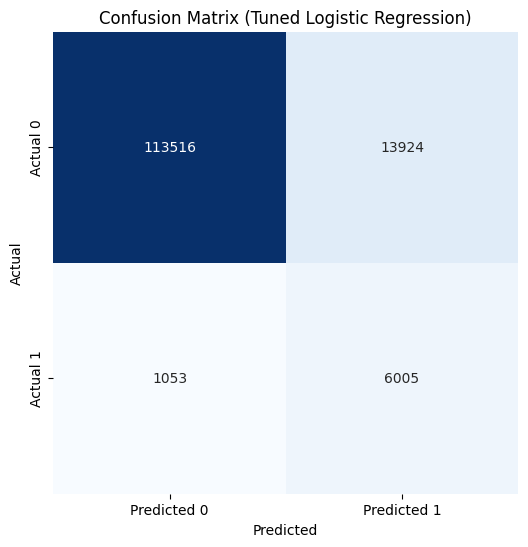

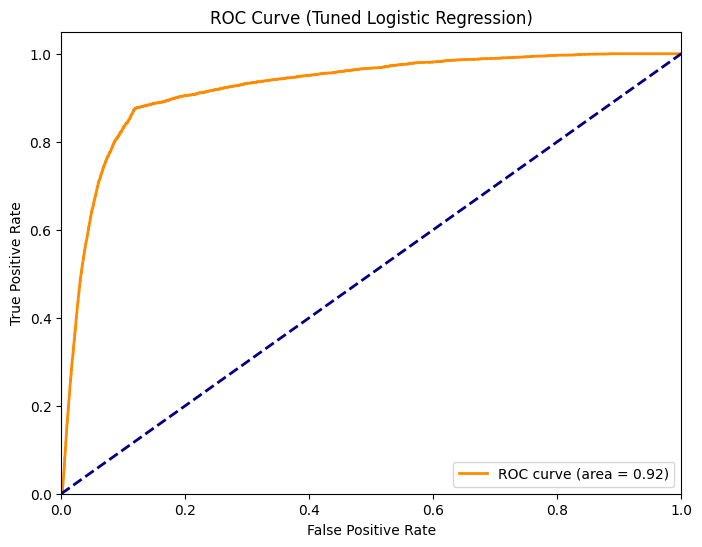

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distribution_lr = {
    'C': [ 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search_lr = RandomizedSearchCV(estimator=LogisticRegression(), param_distributions=param_distribution_lr, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search_lr.fit(X_train_smote1, y_train_smote1)

best_params_lr = random_search_lr.best_params_
print(f"Best hyperparameters for Logistic Regression: {best_params_lr}")

best_logistic_regression = LogisticRegression(**best_params_lr)
best_logistic_regression.fit(X_train_smote1, y_train_smote1)
y_pred_lr_tuned = best_logistic_regression.predict(X_test1)
y_prob_lr_tuned = best_logistic_regression.predict_proba(X_test1)[:, 1]

accuracy_lr_tuned = accuracy_score(y_test1, y_pred_lr_tuned)
precision_lr_tuned = precision_score(y_test1, y_pred_lr_tuned)
recall_lr_tuned = recall_score(y_test1, y_pred_lr_tuned)
f1_lr_tuned = f1_score(y_test1, y_pred_lr_tuned)

conf_matrix_lr_tuned = confusion_matrix(y_test1, y_pred_lr_tuned)
TN_lr_tuned = conf_matrix_lr_tuned[0,0]
FP_lr_tuned = conf_matrix_lr_tuned[0,1]
FN_lr_tuned = conf_matrix_lr_tuned[1,0]
TP_lr_tuned = conf_matrix_lr_tuned[1,1]

FPR_lr_tuned = FP_lr_tuned / (FP_lr_tuned + TN_lr_tuned)
TPR_lr_tuned = TP_lr_tuned / (TP_lr_tuned + FN_lr_tuned)
FNR_lr_tuned = FN_lr_tuned / (FN_lr_tuned + TP_lr_tuned)
TNR_lr_tuned = TN_lr_tuned / (TN_lr_tuned + FP_lr_tuned)

youden_j_lr_tuned = TPR_lr_tuned - FPR_lr_tuned

fpr_lr_tuned, tpr_lr_tuned, thresholds_lr_tuned = roc_curve(y_test1, y_prob_lr_tuned)
roc_auc_lr_tuned = auc(fpr_lr_tuned, tpr_lr_tuned)

print(f"Tuned Logistic Regression - Accuracy: {accuracy_lr_tuned}")
print(f"Tuned Logistic Regression - Precision: {precision_lr_tuned}")
print(f"Tuned Logistic Regression - Recall: {recall_lr_tuned}")
print(f"Tuned Logistic Regression - F1 Score: {f1_lr_tuned}")
print(f"Tuned Logistic Regression - FPR: {FPR_lr_tuned}")
print(f"Tuned Logistic Regression - TPR: {TPR_lr_tuned}")
print(f"Tuned Logistic Regression - FNR: {FNR_lr_tuned}")
print(f"Tuned Logistic Regression - TNR: {TNR_lr_tuned}")
print(f"Tuned Logistic Regression - Youden's J: {youden_j_lr_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lr_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_tuned, tpr_lr_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

####Tuned Gradient Boost Model

Best hyperparameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}
Tuned Gradient Boosting - Accuracy: 0.9515085726181802
Tuned Gradient Boosting - Precision: 0.5239328451509198
Tuned Gradient Boosting - Recall: 0.831255313119864
Tuned Gradient Boosting - F1 Score: 0.6427475898334795
Tuned Gradient Boosting - FPR: 0.041831450094161955
Tuned Gradient Boosting - TPR: 0.831255313119864
Tuned Gradient Boosting - FNR: 0.16874468688013602
Tuned Gradient Boosting - TNR: 0.958168549905838
Tuned Gradient Boosting - Youden's J: 0.789423863025702


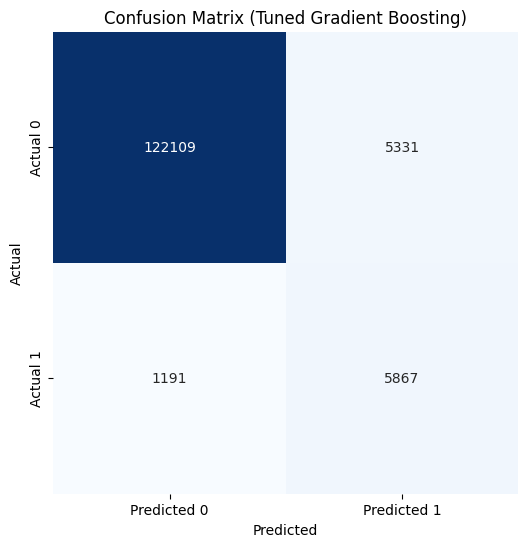

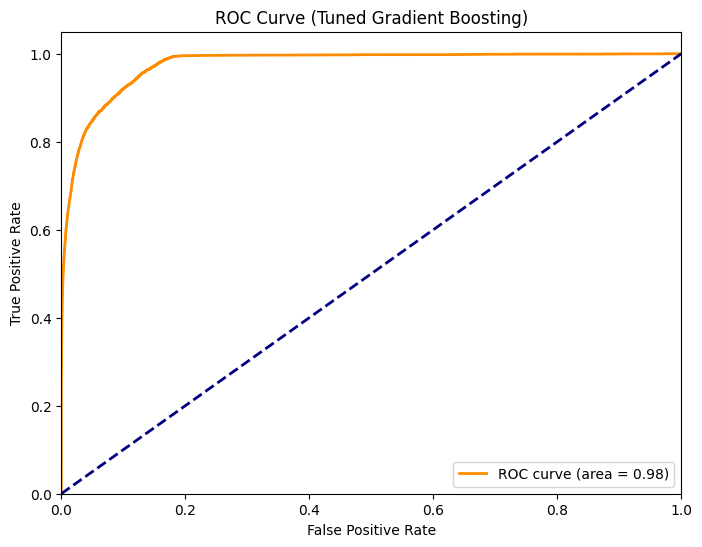

In [ ]:
param_distribution_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_distribution_gb, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

random_search_gb.fit(X_train_smote1, y_train_smote1)

best_params_gb = random_search_gb.best_params_
print(f"Best hyperparameters for Gradient Boosting: {best_params_gb}")

best_gradient_boosting = GradientBoostingClassifier(**best_params_gb)
best_gradient_boosting.fit(X_train_smote1, y_train_smote1)
y_pred_gb_tuned = best_gradient_boosting.predict(X_test1)
y_prob_gb_tuned = best_gradient_boosting.predict_proba(X_test1)[:, 1]

accuracy_gb_tuned = accuracy_score(y_test1, y_pred_gb_tuned)
precision_gb_tuned = precision_score(y_test1, y_pred_gb_tuned)
recall_gb_tuned = recall_score(y_test1, y_pred_gb_tuned)
f1_gb_tuned = f1_score(y_test1, y_pred_gb_tuned)

conf_matrix_gb_tuned = confusion_matrix(y_test1, y_pred_gb_tuned)
TN_gb_tuned = conf_matrix_gb_tuned[0, 0]
FP_gb_tuned = conf_matrix_gb_tuned[0, 1]
FN_gb_tuned = conf_matrix_gb_tuned[1, 0]
TP_gb_tuned = conf_matrix_gb_tuned[1, 1]

FPR_gb_tuned = FP_gb_tuned / (FP_gb_tuned + TN_gb_tuned) if (FP_gb_tuned + TN_gb_tuned) != 0 else 0
TPR_gb_tuned = TP_gb_tuned / (TP_gb_tuned + FN_gb_tuned) if (TP_gb_tuned + FN_gb_tuned) != 0 else 0
FNR_gb_tuned = FN_gb_tuned / (FN_gb_tuned + TP_gb_tuned) if (FN_gb_tuned + TP_gb_tuned) != 0 else 0
TNR_gb_tuned = TN_gb_tuned / (TN_gb_tuned + FP_gb_tuned) if (TN_gb_tuned + FP_gb_tuned) != 0 else 0

youden_j_gb_tuned = TPR_gb_tuned - FPR_gb_tuned

fpr_gb_tuned, tpr_gb_tuned, thresholds_gb_tuned = roc_curve(y_test1, y_prob_gb_tuned)
roc_auc_gb_tuned = auc(fpr_gb_tuned, tpr_gb_tuned)

print(f"Tuned Gradient Boosting - Accuracy: {accuracy_gb_tuned}")
print(f"Tuned Gradient Boosting - Precision: {precision_gb_tuned}")
print(f"Tuned Gradient Boosting - Recall: {recall_gb_tuned}")
print(f"Tuned Gradient Boosting - F1 Score: {f1_gb_tuned}")
print(f"Tuned Gradient Boosting - FPR: {FPR_gb_tuned}")
print(f"Tuned Gradient Boosting - TPR: {TPR_gb_tuned}")
print(f"Tuned Gradient Boosting - FNR: {FNR_gb_tuned}")
print(f"Tuned Gradient Boosting - TNR: {TNR_gb_tuned}")
print(f"Tuned Gradient Boosting - Youden's J: {youden_j_gb_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_gb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb_tuned, tpr_gb_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned Gradient Boosting)')
plt.legend(loc="lower right")
plt.show()

####Tuned XGBoost Model

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:08:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best hyperparameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:08:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tuned XGBoost - Accuracy: 0.9604306383738048
Tuned XGBoost - Precision: 0.5962946527623696
Tuned XGBoost - Recall: 0.7615471805043922
Tuned XGBoost - F1 Score: 0.6688651070184171
Tuned XGBoost - FPR: 0.028554613935969867
Tuned XGBoost - TPR: 0.7615471805043922
Tuned XGBoost - FNR: 0.23845281949560782
Tuned XGBoost - TNR: 0.9714453860640301
Tuned XGBoost - Youden's J: 0.7329925665684223


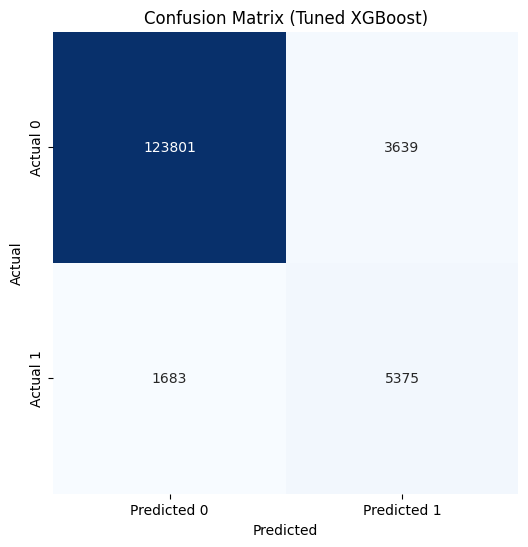

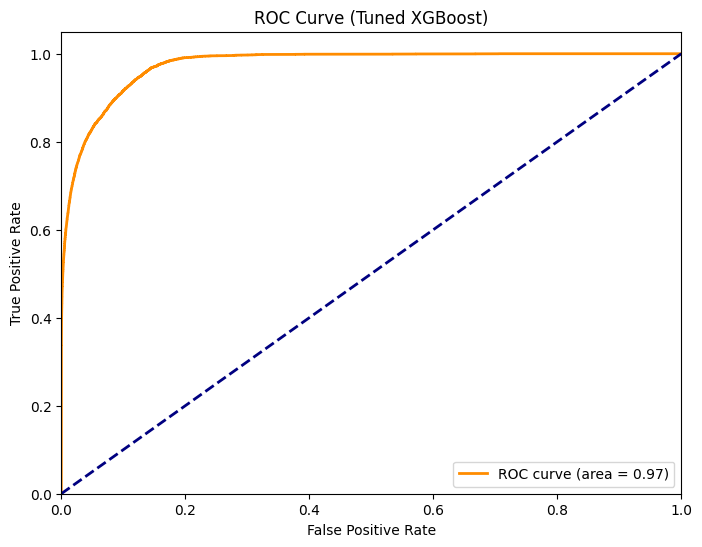

In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid=param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_xgb.fit(X_train_smote1, y_train_smote1)

best_params_xgb = grid_search_xgb.best_params_
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")

best_xgboost = xgb.XGBClassifier(**best_params_xgb, use_label_encoder=False, eval_metric='logloss')
best_xgboost.fit(X_train_smote1, y_train_smote1)
y_pred_xgb_tuned = best_xgboost.predict(X_test1)
y_prob_xgb_tuned = best_xgboost.predict_proba(X_test1)[:, 1]

accuracy_xgb_tuned = accuracy_score(y_test1, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test1, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test1, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test1, y_pred_xgb_tuned)

conf_matrix_xgb_tuned = confusion_matrix(y_test1, y_pred_xgb_tuned)
TN_xgb_tuned = conf_matrix_xgb_tuned[0, 0]
FP_xgb_tuned = conf_matrix_xgb_tuned[0, 1]
FN_xgb_tuned = conf_matrix_xgb_tuned[1, 0]
TP_xgb_tuned = conf_matrix_xgb_tuned[1, 1]

FPR_xgb_tuned = FP_xgb_tuned / (FP_xgb_tuned + TN_xgb_tuned) if (FP_xgb_tuned + TN_xgb_tuned) != 0 else 0
TPR_xgb_tuned = TP_xgb_tuned / (TP_xgb_tuned + FN_xgb_tuned) if (TP_xgb_tuned + FN_xgb_tuned) != 0 else 0
FNR_xgb_tuned = FN_xgb_tuned / (FN_xgb_tuned + TP_xgb_tuned) if (FN_xgb_tuned + TP_xgb_tuned) != 0 else 0
TNR_xgb_tuned = TN_xgb_tuned / (TN_xgb_tuned + FP_xgb_tuned) if (TN_xgb_tuned + FP_xgb_tuned) != 0 else 0

youden_j_xgb_tuned = TPR_xgb_tuned - FPR_xgb_tuned

fpr_xgb_tuned, tpr_xgb_tuned, thresholds_xgb_tuned = roc_curve(y_test1, y_prob_xgb_tuned)
roc_auc_xgb_tuned = auc(fpr_xgb_tuned, tpr_xgb_tuned)

print(f"Tuned XGBoost - Accuracy: {accuracy_xgb_tuned}")
print(f"Tuned XGBoost - Precision: {precision_xgb_tuned}")
print(f"Tuned XGBoost - Recall: {recall_xgb_tuned}")
print(f"Tuned XGBoost - F1 Score: {f1_xgb_tuned}")
print(f"Tuned XGBoost - FPR: {FPR_xgb_tuned}")
print(f"Tuned XGBoost - TPR: {TPR_xgb_tuned}")
print(f"Tuned XGBoost - FNR: {FNR_xgb_tuned}")
print(f"Tuned XGBoost - TNR: {TNR_xgb_tuned}")
print(f"Tuned XGBoost - Youden's J: {youden_j_xgb_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned XGBoost)')
plt.legend(loc="lower right")
plt.show()

####Tuned AdaBoost Model

Best hyperparameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}
Tuned AdaBoost - Accuracy: 0.9082885990869752
Tuned AdaBoost - Precision: 0.3485622453079263
Tuned AdaBoost - Recall: 0.8604420515726835
Tuned AdaBoost - F1 Score: 0.4961398635676647
Tuned AdaBoost - FPR: 0.08906151914626491
Tuned AdaBoost - TPR: 0.8604420515726835
Tuned AdaBoost - FNR: 0.13955794842731653
Tuned AdaBoost - TNR: 0.9109384808537351
Tuned AdaBoost - Youden's J: 0.7713805324264186


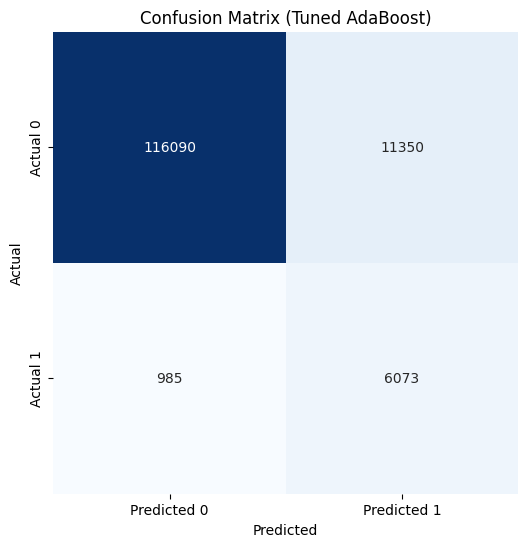

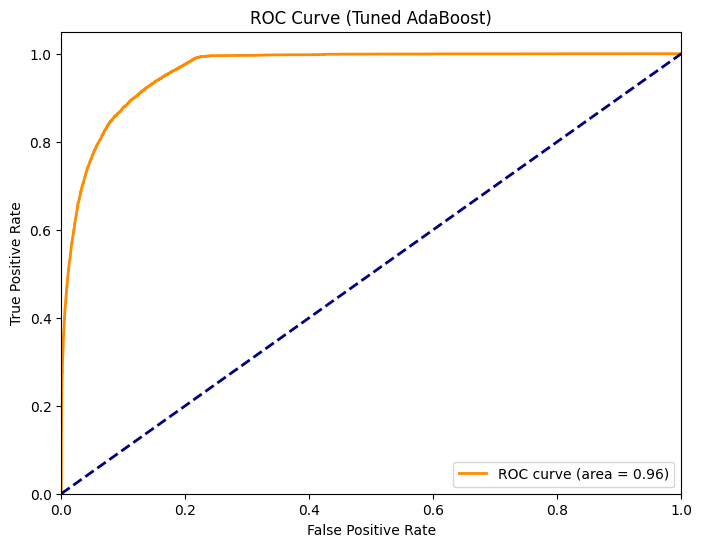

In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search_ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_ada, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_ada.fit(X_train_smote1, y_train_smote1)

best_params_ada = grid_search_ada.best_params_
print(f"Best hyperparameters for AdaBoost: {best_params_ada}")

best_adaBoost = AdaBoostClassifier(**best_params_ada)
best_adaBoost.fit(X_train_smote1, y_train_smote1)
y_pred_ada_tuned = best_adaBoost.predict(X_test1)
y_prob_ada_tuned = best_adaBoost.predict_proba(X_test1)[:, 1]

accuracy_ada_tuned = accuracy_score(y_test1, y_pred_ada_tuned)
precision_ada_tuned = precision_score(y_test1, y_pred_ada_tuned)
recall_ada_tuned = recall_score(y_test1, y_pred_ada_tuned)
f1_ada_tuned = f1_score(y_test1, y_pred_ada_tuned)

conf_matrix_ada_tuned = confusion_matrix(y_test1, y_pred_ada_tuned)
TN_ada_tuned = conf_matrix_ada_tuned[0, 0]
FP_ada_tuned = conf_matrix_ada_tuned[0, 1]
FN_ada_tuned = conf_matrix_ada_tuned[1, 0]
TP_ada_tuned = conf_matrix_ada_tuned[1, 1]

FPR_ada_tuned = FP_ada_tuned / (FP_ada_tuned + TN_ada_tuned) if (FP_ada_tuned + TN_ada_tuned) != 0 else 0
TPR_ada_tuned = TP_ada_tuned / (TP_ada_tuned + FN_ada_tuned) if (TP_ada_tuned + FN_ada_tuned) != 0 else 0
FNR_ada_tuned = FN_ada_tuned / (FN_ada_tuned + TP_ada_tuned) if (FN_ada_tuned + TP_ada_tuned) != 0 else 0
TNR_ada_tuned = TN_ada_tuned / (TN_ada_tuned + FP_ada_tuned) if (TN_ada_tuned + FP_ada_tuned) != 0 else 0

youden_j_ada_tuned = TPR_ada_tuned - FPR_ada_tuned

fpr_ada_tuned, tpr_ada_tuned, thresholds_ada_tuned = roc_curve(y_test1, y_prob_ada_tuned)
roc_auc_ada_tuned = auc(fpr_ada_tuned, tpr_ada_tuned)

print(f"Tuned AdaBoost - Accuracy: {accuracy_ada_tuned}")
print(f"Tuned AdaBoost - Precision: {precision_ada_tuned}")
print(f"Tuned AdaBoost - Recall: {recall_ada_tuned}")
print(f"Tuned AdaBoost - F1 Score: {f1_ada_tuned}")
print(f"Tuned AdaBoost - FPR: {FPR_ada_tuned}")
print(f"Tuned AdaBoost - TPR: {TPR_ada_tuned}")
print(f"Tuned AdaBoost - FNR: {FNR_ada_tuned}")
print(f"Tuned AdaBoost - TNR: {TNR_ada_tuned}")
print(f"Tuned AdaBoost - Youden's J: {youden_j_ada_tuned}")

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_ada_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Tuned AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr_ada_tuned, tpr_ada_tuned, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ada_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Tuned AdaBoost)')
plt.legend(loc="lower right")
plt.show()

###Best Parameters after tuning

####Naive Bayes

In [ ]:
print(f"Best score for Naive Bayes: {grid_search_nb.best_score_}")
print(f"Best estimators for Naive Bayes: {grid_search_nb.best_estimator_}")
print(f"Best parameters for Naive Bayes: {grid_search_nb.best_params_}")

Best score for Naive Bayes: 0.5007228041269467
Best estimators for Naive Bayes: GaussianNB(var_smoothing=1.2328467394420635e-09)
Best parameters for Naive Bayes: {'var_smoothing': 1.2328467394420635e-09}


####Decision Tree

In [ ]:
print(f"Best score for Decision Tree: {grid_search_dt.best_score_}")
print(f"Best estimators for Decision Tree: {grid_search_dt.best_estimator_}")
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

Best score for Decision Tree: 0.9698148366089994
Best estimators for Decision Tree: DecisionTreeClassifier(criterion='entropy')
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


####Random Forest

In [ ]:
print(f"Best score for Random Forest: {grid_search_rf.best_score_}")
print(f"Best estimators for Random Forest: {grid_search_rf.best_estimator_}")
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")

Best score for Random Forest: 0.9796957749794044
Best estimators for Random Forest: RandomForestClassifier(n_jobs=-1, random_state=42)
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


####Logistic Regression

In [ ]:
print(f"Best score for Logistic Regression: {random_search_lr.best_score_}")
print(f"Best estimators for Logistic Regression: {random_search_lr.best_estimator_}")
print(f"Best parameters for Logistic Regression: {random_search_lr.best_params_}")

Best score for Logistic Regression: 0.9236848299399787
Best estimators for Logistic Regression: LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Best parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


####Gradient Boost

In [ ]:
print(f"Best score for Gradient Boosting: {random_search_gb.best_score_}")
print(f"Best estimators for Gradient Boosting: {random_search_gb.best_estimator_}")
print(f"Best parameters for Gradient Boosting: {random_search_gb.best_params_}")

Best score for Gradient Boosting: 0.9622994390176925
Best estimators for Gradient Boosting: GradientBoostingClassifier(max_depth=7)
Best parameters for Gradient Boosting: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 7, 'learning_rate': 0.1}


####XGBoost

In [ ]:
print(f"Best score for XGBoost: {grid_search_xgb.best_score_}")
print(f"Best estimators for XGBoost: {grid_search_xgb.best_estimator_}")
print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

Best score for XGBoost: 0.9758316660782237
Best estimators for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


####AdaBoost

In [ ]:
print(f"Best score for AdaBoost: {grid_search_ada.best_score_}")
print(f"Best estimators for AdaBoost: {grid_search_ada.best_estimator_}")
print(f"Best parameters for AdaBoost: {grid_search_ada.best_params_}")

Best score for AdaBoost: 0.939570828920011
Best estimators for AdaBoost: AdaBoostClassifier(learning_rate=1, n_estimators=200)
Best parameters for AdaBoost: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 200}
